# BEFORE YOU BEGIN:
## Run cells until the next markdown cell to avoid having to rerun all models

In [9]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from keras.models import load_model
from keras import optimizers
from keras import losses
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Convolution2D, MaxPooling2D

import tensorflow as tf
from keras import backend as K

import os
import h5py

In [10]:
train = pd.read_csv('./sign-language-mnist/sign_mnist_train.csv')

test = pd.read_csv('./sign-language-mnist/sign_mnist_test.csv')

In [11]:
set(train['label'].unique())

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24}

In [14]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [15]:
print("train_shape: ", train.shape)
print("test_shape: ", test.shape)

train_shape:  (27455, 785)
test_shape:  (7172, 785)


In [16]:
X = train.drop(['label'], axis=1).values
y = train['label'].values

testset_X = test.drop(['label'], axis=1).values
testset_y = test['label'].values

In [17]:
# change shape of data
X = X.reshape(X.shape[0], 28, 28, 1)

testset_X = testset_X.reshape(testset_X.shape[0], 28, 28, 1)

In [18]:
# change the data from integer to float
X = X.astype('float32')

testset_X = testset_X.astype('float32')

In [19]:
# scale data
X /= 255

testset_X /= 255

In [20]:
# one hot encode our y variables of our data
y = to_categorical(y)

testset_y = to_categorical(testset_y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Run all cells above this point, then skip to desired model below...

In [30]:
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train,
                   epochs=20,
                   batch_size=1000,
                   verbose=0)

loss, acc = model.evaluate(testset_X, testset_y)

print('test loss: ', score)
print('test accuracy: ', acc)

7172/7172 [==============================] - 2s 298us/step
test score:  0.24665342409701835
test accuracy:  0.9136921360847742


In [18]:
history.history['acc'][-1]

0.9629935404968484

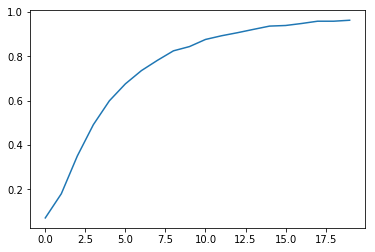

In [19]:
plt.plot(history.history['acc']);

In [20]:
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
history = model.fit(X_train, y_train,
                   epochs=20,
                   batch_size=1000,
                   verbose=0)

0.936282840764955


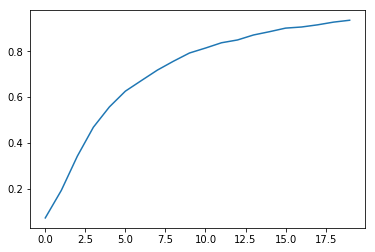

In [22]:
print(history.history['acc'][-1])
plt.plot(history.history['acc']);

In [28]:
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))

model.add(Dropout(0.4))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
history = model.fit(X_train, y_train,
                   epochs=20,
                   batch_size=1000,
                   verbose=0)

0.9458015593408606


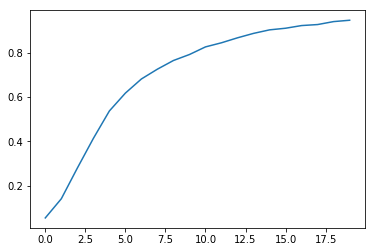

In [29]:
print(history.history['acc'][-1])
plt.plot(history.history['acc']);

In [31]:
# !pip3 install --upgrade keras

Requirement already up-to-date: keras in /Users/dianaha/anaconda3/lib/python3.6/site-packages (2.2.0)
Requirement not upgraded as not directly required: keras-applications==1.0.2 in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras) (1.0.2)
Requirement not upgraded as not directly required: keras-preprocessing==1.0.1 in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras) (1.0.1)
Requirement not upgraded as not directly required: six>=1.9.0 in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras) (1.11.0)
Requirement not upgraded as not directly required: h5py in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras) (2.7.1)
Requirement not upgraded as not directly required: pyyaml in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras) (3.12)
Requirement not upgraded as not directly required: scipy>=0.14 in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras) (1.0.0)
Requirement not upgraded as not directly r

In [21]:
# !pip3 install --upgrade keras==2.1.3

    100% |████████████████████████████████| 327kB 6.6MB/s ta 0:00:011
Requirement not upgraded as not directly required: pyyaml in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras==2.1.3) (3.12)
Requirement not upgraded as not directly required: scipy>=0.14 in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras==2.1.3) (1.0.0)
Requirement not upgraded as not directly required: numpy>=1.9.1 in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras==2.1.3) (1.14.0)
Requirement not upgraded as not directly required: six>=1.9.0 in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras==2.1.3) (1.11.0)
keras-preprocessing 1.0.1 has requirement keras>=2.1.6, but you'll have keras 2.1.3 which is incompatible.
keras-applications 1.0.2 has requirement keras>=2.1.6, but you'll have keras 2.1.3 which is incompatible.
  Found existing installation: Keras 2.2.0
    Uninstalling Keras-2.2.0:
      Successfully uninstalled Keras-2.2.0


In [25]:
# !pip3 list | grep tensorflow

tensorflow                         1.8.0           
tensorflow-hub                     0.1.0           


In [30]:
# !python3 -c "import keras; print(keras.__version__)"

/Users/dianaha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
Couldn't import dot_parser, loading of dot files will not be possible.
2.2.0


In [42]:
# !conda update tensorflow --y

Solving environment: done

## Package Plan ##

  environment location: /Users/dianaha/anaconda3

  added / updated specs: 
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tensorflow-1.1.0           |      np112py36_0        23.6 MB
    pymc3-3.3                  |           py36_0         1.2 MB
    keras-base-2.2.0           |           py36_0         449 KB
    keras-preprocessing-1.0.1  |           py36_0          45 KB
    keras-2.2.0                |                0           5 KB
    keras-applications-1.0.2   |           py36_0          47 KB
    scikit-image-0.14.0        |   py36h0a44026_1        23.4 MB
    numba-0.36.2               |np112py36h37f72b1_0         2.3 MB
    numpy-1.12.1               |   py36h8871d66_1         3.6 MB
    ------------------------------------------------------------
                                           Total:        54.6 

In [21]:
# !pip install -U keras tensorflow

Requirement already up-to-date: keras in /Users/dianaha/anaconda3/lib/python3.6/site-packages (2.2.0)
  Using cached https://files.pythonhosted.org/packages/03/ad/d732a5d9d50bfcd8aeb6e4a266065a8868829388e4e2b529ff689f1fc923/tensorflow-1.8.0-cp36-cp36m-macosx_10_11_x86_64.whl
Requirement not upgraded as not directly required: numpy>=1.9.1 in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras) (1.12.1)
Requirement not upgraded as not directly required: scipy>=0.14 in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras) (1.0.0)
Requirement not upgraded as not directly required: six>=1.9.0 in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras) (1.11.0)
Requirement not upgraded as not directly required: pyyaml in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras) (3.12)
Requirement not upgraded as not directly required: h5py in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from keras) (2.7.1)
Requirement not upgraded as not dir

In [23]:
# !conda upgrade numpy

Solving environment: done

# All requested packages already installed.



In [26]:
# !pip3 install --upgrade tensorflow 

Requirement already up-to-date: tensorflow in /Users/dianaha/anaconda3/lib/python3.6/site-packages (1.8.0)
Requirement not upgraded as not directly required: termcolor>=1.1.0 in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from tensorflow) (1.1.0)
Requirement not upgraded as not directly required: gast>=0.2.0 in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from tensorflow) (0.2.0)
Requirement not upgraded as not directly required: protobuf>=3.4.0 in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from tensorflow) (3.5.2)
  Using cached https://files.pythonhosted.org/packages/f6/cd/b2c50b5190b66c711c23ef23c41d450297eb5a54d2033f8dcb3b8b13ac85/numpy-1.14.5-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
Requirement not upgraded as not directly required: six>=1.10.0 in /Users/dianaha/anaconda3/lib/python3.6/site-packages (from tensorflow) (1.11.0)
Requirement not upgraded as not directly required: tensorbo

In [31]:
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.2737865300710914
test accuracy:  0.9267986614612381


In [39]:
# changed epochs from 20 to 30
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))

model.add(Convolution2D(filters=64,
                      kernel_size=3,
                      activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=30, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.23733289059011575
test accuracy:  0.9228945900725042


In [41]:
# change epochs from 20 to 40
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=40, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.30756135211908975
test accuracy:  0.9241494701617401


In [42]:
# added dropout of 0.2 after every maxpool layer
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.2))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.17073229849296978
test accuracy:  0.945064138315672


In [43]:
# changed optimizer from adam to sgd
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  3.1748576914207005
test accuracy:  0.06595092024539877


In [45]:
from keras.optimizers import SGD

# changed optimizer from adam to sgd
# changed sgd default parameters
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)  # taken from VGG-like example
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  3.198444426292424
test accuracy:  0.04782487451199108


In [46]:
# added dropout of 0.25 after every maxpool layer
# changed final dropout to 0.5
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.19644637139928586
test accuracy:  0.9484104852203011


In [47]:
# added dropout of 0.5 after every maxpool layer
# changed final dropout to 0.5
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.5))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.1914532310529355
test accuracy:  0.9456218627997769


In [48]:
# added dropout of 0.4 after every maxpool layer
# changed final dropout to 0.4
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.4))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.14614794927099134
test accuracy:  0.9491076408254322


In [22]:
## BEST at 0.96
# added dropout of 0.3 after every maxpool layer
# changed final dropout to 0.4
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

# model.save("model3.h5")

print('test loss: ', score[0])
print('test accuracy: ', score[1])
# first run: 0.96+
# saved run - model1: 0.95775

AttributeError: module 'h5py' has no attribute 'File'

In [50]:
# added dropout of 0.4 / 0.3 after every maxpool layer
# changed final dropout to 0.4
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.4))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.16947355587450955
test accuracy:  0.949665365309537


In [21]:
# added dropout of 0.3 / 0.4 after every maxpool layer
# changed final dropout to 0.4
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

# model.save("model2.h5")

print('test loss: ', score[0])
print('test accuracy: ', score[1])
# first run: 0.958+
# saved run - model2: 0.946

test loss:  0.16777871462626345
test accuracy:  0.9461795872838817


In [52]:
# added dropout of 0.3/0.35 after every maxpool layer
# changed final dropout to 0.4
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.15717389920884323
test accuracy:  0.9535694366982711


In [54]:
# added dropout of 0.3 after every maxpool layer
# changed final dropout to 0.4
# adam to rmsprop
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.2299371942227454
test accuracy:  0.9256832124930284


In [55]:
# added dropout of 0.3 after every maxpool layer
# changed final dropout to 0.4
# adam to adagrad
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.26734018234387497
test accuracy:  0.90574456218628


In [56]:
# added dropout of 0.3 after every maxpool layer
# changed final dropout to 0.4
# adam to adadelta
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.23570776082745692
test accuracy:  0.9182933630786392


In [57]:
# added dropout of 0.3 after every maxpool layer
# changed final dropout to 0.4
# adam to adamax
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.2212151524200994
test accuracy:  0.930005577244841


In [58]:
# added dropout of 0.3 after every maxpool layer
# changed final dropout to 0.4
# adam to nadam
model = Sequential()
model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.14908412914346966
test accuracy:  0.9552426101505856


# BEST Baseline 96% with 0.3 DO and 0.4 final DO

In [11]:
# added Conv2D=16 and MaxPool and Dropout
model = Sequential()

model.add(Convolution2D(filters=16,
                       kernel_size=2,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))


model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.4078451049224797
test accuracy:  0.8623814835471277


In [13]:
# added Conv2D=16 and MaxPool and Dropout
# second MaxPool pool_size changed from 2 to 5
model = Sequential()

model.add(Convolution2D(filters=16,
                       kernel_size=2,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))


model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.5443214864137116
test accuracy:  0.8448131622978249


In [15]:
# added Conv2D=16 and MaxPool and Dropout
# 2nd and 3rd MaxPool pool_size changed from 2 to 5
model = Sequential()

model.add(Convolution2D(filters=16,
                       kernel_size=2,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))


model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.4324156413580942
test accuracy:  0.8667038482989403


In [18]:
# added Conv2D=16 and MaxPool and Dropout; kernel changed from 2 to 3
# 2nd and 3rd MaxPool pool_size changed from 2 to 5
model = Sequential()

model.add(Convolution2D(filters=16,
                       kernel_size=3,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))


model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.3021635857295937
test accuracy:  0.9216397099832683


In [19]:
# added Conv2D=16 and MaxPool and Dropout; kernel changed from 2 to 1
# 2nd and 3rd MaxPool pool_size changed from 2 to 5
model = Sequential()

model.add(Convolution2D(filters=16,
                       kernel_size=1,
                       activation='relu',
                       input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))


model.add(Convolution2D(filters =32,
                       kernel_size=5,
                       activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5),
                         strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Convolution2D(filters=64,
                      kernel_size=5,
                      activation='relu'))
model.add(MaxPooling2D(pool_size=(5,5),
                        strides=2,
                        padding='same'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(60, activation='relu'))
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                               
model.fit(X_train, y_train, epochs=20, batch_size=1000, verbose=0, validation_data=(X_test, y_test))

score = model.evaluate(testset_X, testset_y, verbose=0)

print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.9827041394605494
test accuracy:  0.666201896263246
